In [39]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
with open('../track_coverage.json') as user_file:
  coverage_file = json.load(user_file)
print(coverage_file.keys())
print(len(coverage_file['crs']))
print(len(coverage_file['features']))
print(len(coverage_file['name']))
print(len(coverage_file['type']))
num_scenes = len(coverage_file['features'])

dict_keys(['crs', 'features', 'name', 'type'])
2
34001
11
17


In [11]:
count_wv_range = 0
count_wv_med = 0
count_elev_med = 0
count_slope = 0
count_zen = 0

for i in range(num_scenes):
    if 'Retrieved WV 2' in (coverage_file['features'][i])['properties'] and 'Retrieved WV 98' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_wv_range += 1
    if 'Retrieved Ele. Median' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_elev_med += 1
    if 'Retrieved WV Median' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_wv_med += 1
    if 'Slope (local surface slope as derived from DEM in degrees)' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_slope += 1
    if 'To-sun zenith (0 to 90 degrees from zenith)' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_zen += 1

print('WV range', count_wv_range)
print('WV med', count_wv_med)
print('Elev med', count_elev_med)
print('Slope', count_slope)
print('Zen', count_zen)

WV range 181
WV med 181
Elev med 181
Slope 0
Zen 0


In [12]:
WV_range = []
no_range = []

WV_med = []
no_wv_med = []

elev = []
no_elev = []

slope = []

zen = []

lat = []
lon = []

fid = []

for i in range(len(coverage_file['features'])):

    if 'Retrieved WV 2' in (coverage_file['features'][i])['properties'] and 'Retrieved WV 98' in (coverage_file['features'][i])['properties']:
        WV_range.append((((coverage_file['features'][i])['properties'])['Retrieved WV 98']) - (((coverage_file['features'][i])['properties'])['Retrieved WV 2']))
        elev.append(((coverage_file['features'][i])['properties'])['Retrieved Ele. Median'])
        WV_med.append(((coverage_file['features'][i])['properties'])['Retrieved WV Median'])
        slope.append(((coverage_file['features'][i])['properties'])['Slope (local surface slope as derived from DEM in degrees)'])
        zen.append(((coverage_file['features'][i])['properties'])['To-sun zenith (0 to 90 degrees from zenith)'])


        lat_average = (((coverage_file['features'])[i]['geometry']['coordinates'][0][0][0]) + \
            ((coverage_file['features'])[i]['geometry']['coordinates'][0][1][0]))/2
        lon_average = (((coverage_file['features'])[i]['geometry']['coordinates'][0][0][1]) + \
            ((coverage_file['features'])[i]['geometry']['coordinates'][0][1][1]))/2
        lat.append(lat_average)
        lon.append(lon_average)
        fid.append(fid)
    else:
        no_range.append(i)
        no_wv_med.append(i)
        no_elev.append(i)

print(len(WV_range))
print(len(elev))
print(len(WV_med))
print(len(slope))
print(len(zen))
print(len(no_range))

33820
33820
33820
33820
33820
181


In [32]:
df = pd.DataFrame()

In [33]:
df['fid'] = fid
df['elev med'] = elev
df['zen'] = zen
df['slope'] = slope
df['wv range'] = WV_range
df['wv med'] = WV_med

In [34]:
df.shape

(33820, 6)

In [37]:
import pickle
df.to_pickle('../emit_data')

[0.   0.54 1.08 1.62 2.16 2.7  3.24 3.78 4.32 4.86 5.4 ]
[23776.  3609.  1697.  1433.  1208.   738.   379.   152.   699.   129.]


Text(0.5, 0, 'Elevation (km)')

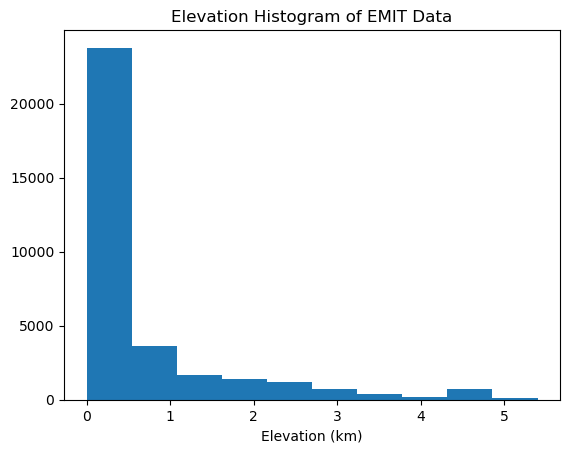

In [44]:
n, bins, patches = plt.hist(elev)
print(bins)
print(n)
plt.title('Elevation Histogram of EMIT Data')
plt.xlabel('Elevation (km)')

[ 0.22   7.347 14.474 21.601 28.728 35.855 42.982 50.109 57.236 64.363
 71.49 ]
[ 669. 1712. 3011. 4601. 6032. 6849. 4921. 3824. 2164.   37.]


Text(0.5, 0, 'Zenith (deg)')

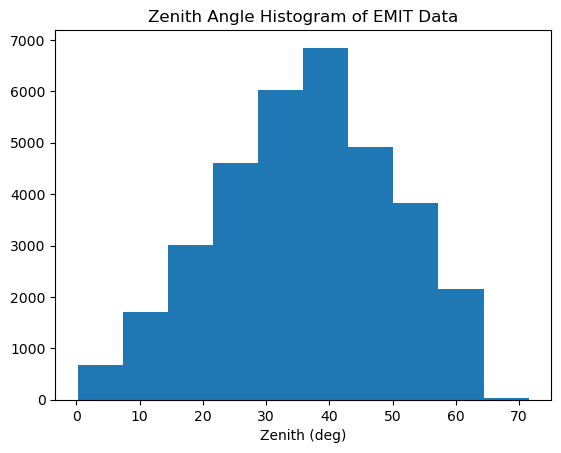

In [45]:
n, bins, patches = plt.hist(zen)
print(bins)
print(n)
plt.title('Zenith Angle Histogram of EMIT Data')
plt.xlabel('Zenith (deg)')

[ 0.     3.542  7.084 10.626 14.168 17.71  21.252 24.794 28.336 31.878
 35.42 ]
[20427.  7495.  2537.  1421.   786.   426.   309.   251.   146.    22.]


Text(0.5, 0, 'Slope')

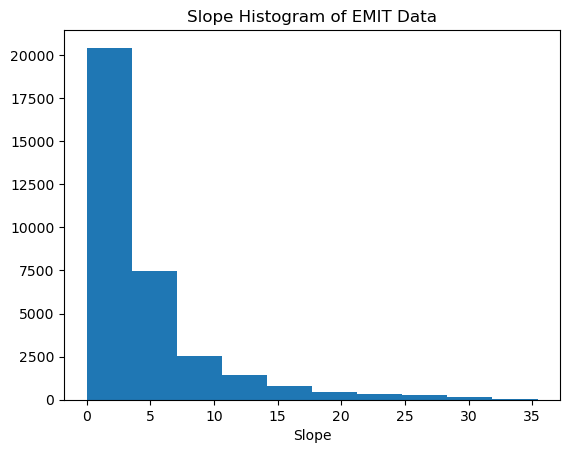

In [46]:
n, bins, patches = plt.hist(slope)
print(bins)
print(n)
plt.title('Slope Histogram of EMIT Data')
plt.xlabel('Slope')

[0.    0.595 1.19  1.785 2.38  2.975 3.57  4.165 4.76  5.355 5.95 ]
[15580.  7185.  4157.  2468.  1709.  1073.   790.   424.   289.   145.]


Text(0.5, 0, 'WV Range (g/cm^2)')

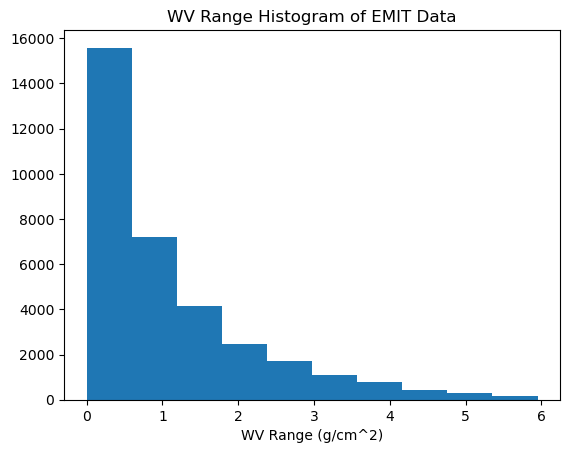

In [47]:
n, bins, patches = plt.hist(WV_range)
print(bins)
print(n)
plt.title('WV Range Histogram of EMIT Data')
plt.xlabel('WV Range (g/cm^2)')

[0.05  0.645 1.24  1.835 2.43  3.025 3.62  4.215 4.81  5.405 6.   ]
[7177. 9409. 7172. 4349. 2455. 1418.  827.  499.  205.  309.]


Text(0.5, 0, 'WV Median (g/cm^2)')

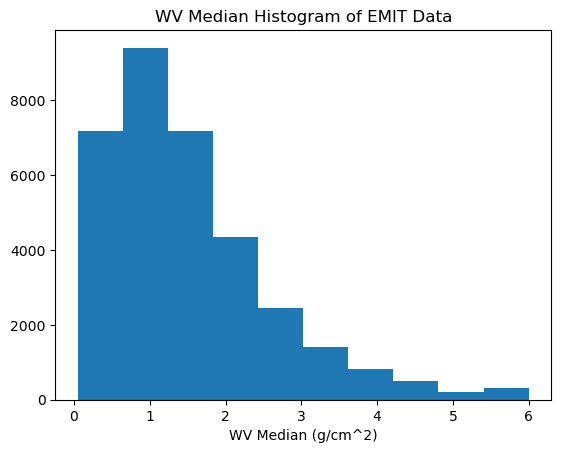

In [48]:
n, bins, patches = plt.hist(WV_med)
print(bins)
print(n)
plt.title('WV Median Histogram of EMIT Data')
plt.xlabel('WV Median (g/cm^2)')